In [16]:
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [17]:
df=pd.read_csv('/content/scaled_wines_df (1)')

In [18]:
df

,rating,num_reviews,body,acidity,encoded_region_price,encoded_wine_price,encoded_winery_price,encoded_type_price,price
0,1.000000,0.003386,0.666667,0.5,0.256762,0.701340,0.158028,0.436337,313.50
1,0.857143,0.997743,1.000000,1.0,0.240427,0.847862,0.710153,0.379728,324.95
2,0.857143,0.663657,1.000000,1.0,0.240427,0.834438,0.703778,0.391837,349.00
3,0.857143,0.348758,1.000000,1.0,0.246182,0.757553,0.670789,0.388055,345.00
4,0.857143,0.341422,1.000000,1.0,0.241330,0.878303,0.670789,0.376627,315.00
...,...,...,...,...,...,...,...,...,...
6379,0.000000,0.207111,0.666667,1.0,0.149694,0.022926,0.095071,0.245417,19.98
6380,0.000000,0.205982,0.666667,1.0,0.274897,0.013212,0.020900,0.416852,16.76
6381,0.000000,0.205982,0.666667,1.0,0.059512,0.034138,0.043541,0.173929,24.45
6382,0.000000,0.205418,1.000000,1.0,0.240427,0.131173,0.166488,0.376627,64.50


In [19]:
#implementing simple linear regresion
def simpleRegresion(x,y):
  n=len(x)

  SSxy=(y*x).sum() - n*(x.mean())*(y.mean())

  SSxx = (x*x).sum() - n*((x.mean())**2)

  weight=SSxy/SSxx
  bias= y.mean() - (weight)*x.mean()

  return weight,bias


In [20]:
#function to get predicted values
def predict(a,b):
  weight,bias=simpleRegresion(a,b)
  prediction=((a*weight) + bias)
  return prediction

In [24]:
#function to create a plot between the actual and predicted data

def compare(absica,predicted,actual):
  plt.scatter(x=absica,y=actual,alpha=0.8)
  plt.plot(absica,predicted,color='r',alpha=0.9)
  plt.xlabel(absica.name)
  plt.ylabel(actual.name)


In [31]:
#function to get rmse(root mean squared error)

def rmse(predicted,actual):
  return np.sqrt(np.mean(np.square(predicted - actual)))

31.363735680131654


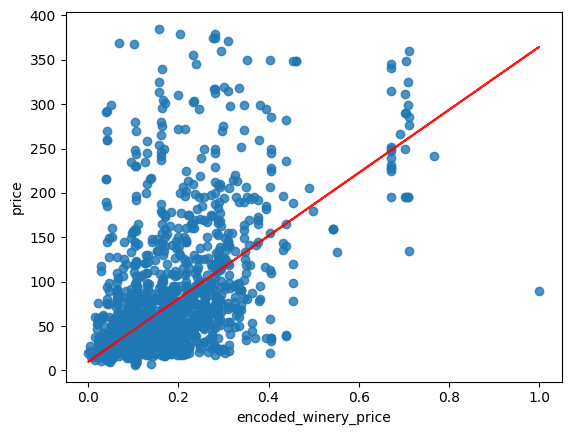

In [33]:
#testing on the dataset with different column pairs
input_x=df['encoded_winery_price']
input_y=df['price']
predictions=predict(input_x,input_y)
compare(input_x,predictions,input_y)
print(rmse(input_y,predictions))

41.469105005568125


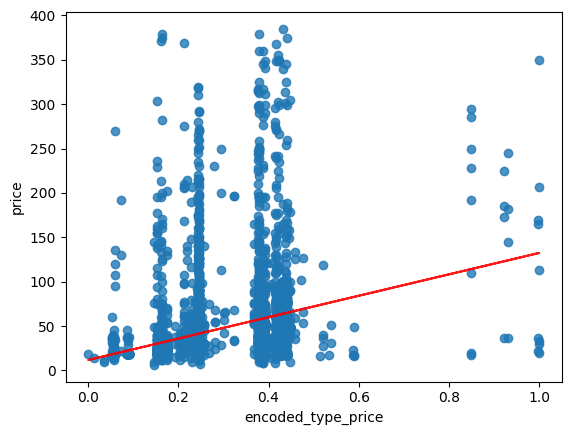

In [34]:
input_x=df['encoded_type_price']
input_y=df['price']
predictions=predict(input_x,input_y)
compare(input_x,predictions,input_y)
print(rmse(input_y,predictions))

35.200197538425854


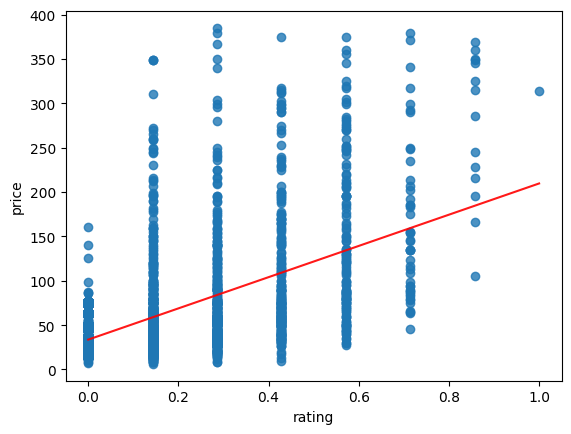

In [35]:
input_x=df['rating']
input_y=df['price']
predictions=predict(input_x,input_y)
compare(input_x,predictions,input_y)
print(rmse(input_y,predictions))